In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns
sns.set()  # for plot styling
%matplotlib inline



In [18]:
#Read the csv file
X=pd.read_csv('customer.csv')


In [20]:
#Explore the dataset
X.head()#top 5 columns
#len(X) # of rows


,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [21]:
#descriptive statistics of the dataset
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


Text(0.5, 0, 'Income / spend')

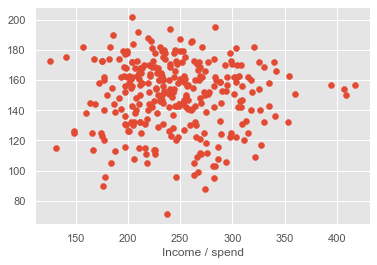

In [50]:
#Visualizing the data 
plt.scatter(X.INCOME,X.SPEND)
plt.xlabel('Income / spend')

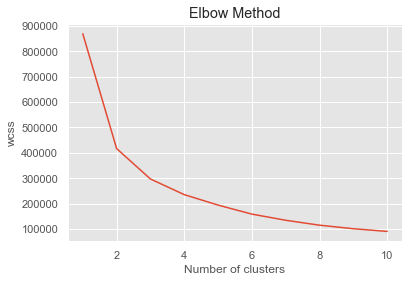

In [23]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [43]:
##Fitting kmeans to the dataset - k=6
km=KMeans(n_clusters=6, random_state=0)
y_means = km.fit_predict(X)
y_means 

array([4, 4, 3, 4, 5, 3, 2, 4, 3, 3, 4, 0, 4, 1, 2, 4, 5, 1, 4, 4, 4, 4,
       4, 4, 3, 2, 3, 1, 5, 3, 3, 1, 3, 2, 1, 3, 2, 4, 4, 5, 2, 4, 3, 0,
       2, 2, 4, 4, 1, 4, 4, 2, 4, 3, 4, 3, 4, 4, 3, 2, 0, 2, 3, 1, 3, 3,
       4, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 2, 2, 2, 0, 4, 2, 3,
       3, 0, 4, 3, 4, 2, 1, 1, 5, 4, 2, 4, 4, 0, 3, 4, 3, 1, 4, 4, 4, 4,
       2, 3, 2, 3, 4, 3, 3, 3, 3, 4, 2, 4, 4, 4, 3, 3, 1, 2, 3, 0, 3, 4,
       2, 4, 2, 4, 1, 1, 1, 0, 2, 2, 3, 4, 1, 4, 4, 4, 4, 3, 4, 1, 4, 2,
       4, 1, 4, 3, 4, 4, 4, 5, 3, 3, 3, 0, 1, 4, 4, 3, 4, 4, 2, 4, 1, 1,
       4, 5, 1, 0, 5, 1, 2, 4, 0, 2, 4, 0, 4, 3, 2, 1, 1, 2, 3, 2, 4, 4,
       0, 4, 3, 0, 0, 2, 1, 4, 4, 4, 1, 3, 4, 0, 1, 2, 4, 5, 0, 2, 0, 4,
       5, 1, 2, 2, 0, 1, 0, 1, 2, 2, 4, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 4,
       1, 0, 1, 2, 5, 0, 2, 4, 2, 4, 0, 2, 0, 2, 0, 1, 4, 4, 4, 4, 0, 4,
       1, 1, 2, 1, 0, 0, 4, 4, 0, 4, 0, 3, 1, 0, 2, 1, 2, 3, 1, 4, 1, 2,
       3, 4, 5, 1, 3, 2, 4, 3, 1, 1, 1, 1, 0, 0, 1,

In [52]:
X['cluster']=y_means


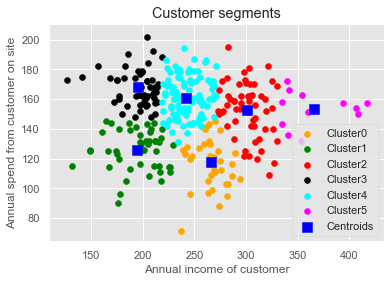

In [49]:
df0=X[X.cluster==0]
df1=X[X.cluster==1]
df2=X[X.cluster==2]
df3=X[X.cluster==3]
df4=X[X.cluster==4]
df5=X[X.cluster==5]
plt.scatter(df0.INCOME,df0.SPEND,c='orange',label='Cluster0')
plt.scatter(df1.INCOME,df1.SPEND,c='green',label='Cluster1')
plt.scatter(df2.INCOME,df2.SPEND,c='red',label='Cluster2')
plt.scatter(df3.INCOME,df3.SPEND,c='black',label='Cluster3')
plt.scatter(df4.INCOME,df4.SPEND,c='cyan',label='Cluster4')
plt.scatter(df5.INCOME,df5.SPEND,c='magenta',label='Cluster5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker='s', c='blue', s=100,label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
